# Homework - Comparing Models
Run the following code and then answer the numbered questions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   left_company                   1000 non-null   object
 1   age                            1000 non-null   int64 
 2   frequency_of_travel            1000 non-null   object
 3   department                     1000 non-null   object
 4   commuting_distance             1000 non-null   int64 
 5   education                      1000 non-null   int64 
 6   satisfaction_with_environment  1000 non-null   int64 
 7   gender                         1000 non-null   object
 8   seniority_level                1000 non-null   int64 
 9   position                       1000 non-null   object
 10  satisfaction_with_job          1000 non-null   int64 
 11  married_or_single              1000 non-null   object
 12  last_raise_pct                 1000 non-null   int64 
 13  last

#### Splitting into training and test sets

In [3]:
from sklearn.model_selection import train_test_split
targetCol = 'left_company'
featureCols = [x for x in df.columns if x != targetCol]

y = df[targetCol]
X = df[featureCols]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

print(f'Target: {targetCol}')
print('Features:')
print(*featureCols, sep=',\t')
print('\n')
print(f'Training examples: {x_train.shape[0]:,}')
print(f'Test examples: {x_test.shape[0]:,}')

Target: left_company
Features:
age,	frequency_of_travel,	department,	commuting_distance,	education,	satisfaction_with_environment,	gender,	seniority_level,	position,	satisfaction_with_job,	married_or_single,	last_raise_pct,	last_performance_rating,	total_years_working,	years_at_company,	years_in_current_job,	years_since_last_promotion,	years_with_current_supervisor


Training examples: 800
Test examples: 200


# Question 1
- Set-up a feature processing pipeline using the training data.  
- While the data doesn't contain missing values, assume the test data could.  
- Use the below lists to split the features that should be treated as numerical and categorical variables.  
- I would recommend printing out verification output to verify the pipeline transforms the data as expected.

In [4]:
numericalFeatures = ['age', 'commuting_distance', 'last_raise_pct', 'total_years_working', 'years_at_company',
                    'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']

categoricalFeatures = ['frequency_of_travel', 'department', 'education', 'satisfaction_with_environment',
                       'gender', 'seniority_level', 'position', 'satisfaction_with_job', 'married_or_single',
                      'last_performance_rating']



In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipe = Pipeline([('impute', SimpleImputer(strategy='median')), 
                     ('scale', StandardScaler())]
                   )

cat_pipe = Pipeline([('impute', SimpleImputer(strategy='most_frequent')), 
                     ('ohe', OneHotEncoder(drop='first'))]
                   )

proc = ColumnTransformer(transformers=[('nums', num_pipe, numericalFeatures),
                                      ('cats', cat_pipe, categoricalFeatures)]
                        )

proc.fit_transform(x_train).shape

(800, 38)

# Question 2
- Using cross-validation evaluate a logistic regression model, evaluate three (4) different regularization strengths with `l2`, with one model containing no regularization.  
- Which regularization strength would be ideal for logistic regression?
- Use as much code as you need to defend your opinion.  
- Comment on your rationale for your choice.

In [6]:
y.value_counts()

No     500
Yes    500
Name: left_company, dtype: int64

> The data is balanced, so will use accuracy to "optimize" our hyperparameters.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

params = {'lg__C': [0.01, 0.1, 1, 10], 'lg__penalty':['l2', 'none']}

lg_model = Pipeline([('fp', proc), 
                     ('lg', LogisticRegression(solver='newton-cg'))
                    ])

lg = GridSearchCV(lg_model, param_grid=params)
lg = lg.fit(x_train, y_train)

lg.best_estimator_

Pipeline(steps=[('fp',
                 ColumnTransformer(transformers=[('nums',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'last_raise_pct',
                                                   'total_years_working',
                                                   'years_at_company',
                                                   'years_in_current_job',
                                                   'years_since_last_promotion',
                                                   'years_with_current_supervisor']),
                                        

In [8]:
lg.best_score_

0.7175

> Best validation accuracy is about 72%. Need to determine variances in the CV results.

In [9]:
lg_results = list(zip(lg.cv_results_['params'],
                      lg.cv_results_['mean_test_score'],
                      lg.cv_results_['std_test_score']
                     )
                 )

noRegCount = 0
for i in lg_results:
    x = i[0]['lg__C']
    y = i[0]['lg__penalty']
    if y == 'none' and noRegCount < 1:
        print(f'No Regularization:, lower acc: {(i[1]-i[2]):.2%}, mean acc: {i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')
        noRegCount += 1
    if y == 'l2':
        print(f'Regularization: {x}, lower acc: {(i[1]-i[2]):.2%}, mean acc:{i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')

Regularization: 0.01, lower acc: 63.06%, mean acc:66.88%, upper acc: 70.69%
No Regularization:, lower acc: 69.57%, mean acc: 71.12%, upper acc: 72.68%
Regularization: 0.1, lower acc: 68.32%, mean acc:71.75%, upper acc: 75.18%
Regularization: 1, lower acc: 68.50%, mean acc:70.75%, upper acc: 73.00%
Regularization: 10, lower acc: 68.86%, mean acc:70.62%, upper acc: 72.39%


> `C=0.1` provides the best model with the training and validation data as it maximizes accuracy. It does have a slightly higher standard deviation, however, the lower bound range is about the same of `C=10` but its upper range is higher. Its fit time is also in-line with the other models so computationally no different than the other choices. Will need to search around `0.1` to determine if that is the best value.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

params = {'lg__C': [0.05, 0.08, 0.1, 0.12, 0.15], 'lg__penalty':['l2', 'none']}

lg_model = Pipeline([('fp', proc), 
                     ('lg', LogisticRegression(solver='newton-cg'))
                    ])

lg = GridSearchCV(lg_model, param_grid=params)
lg = lg.fit(x_train, y_train)

lg.best_estimator_

Pipeline(steps=[('fp',
                 ColumnTransformer(transformers=[('nums',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'last_raise_pct',
                                                   'total_years_working',
                                                   'years_at_company',
                                                   'years_in_current_job',
                                                   'years_since_last_promotion',
                                                   'years_with_current_supervisor']),
                                        

In [11]:
lg_results = list(zip(lg.cv_results_['params'],
                      lg.cv_results_['mean_test_score'],
                      lg.cv_results_['std_test_score']
                     )
                 )

noRegCount = 0
for i in lg_results:
    x = i[0]['lg__C']
    y = i[0]['lg__penalty']
    if y == 'none' and noRegCount < 1:
        print(f'No Regularization:, lower acc: {(i[1]-i[2]):.2%}, mean acc: {i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')
        noRegCount += 1
    if y == 'l2':
        print(f'Regularization: {x}, lower acc: {(i[1]-i[2]):.2%}, mean acc:{i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')

Regularization: 0.05, lower acc: 68.03%, mean acc:70.62%, upper acc: 73.22%
No Regularization:, lower acc: 69.57%, mean acc: 71.12%, upper acc: 72.68%
Regularization: 0.08, lower acc: 68.83%, mean acc:71.38%, upper acc: 73.92%
Regularization: 0.1, lower acc: 68.32%, mean acc:71.75%, upper acc: 75.18%
Regularization: 0.12, lower acc: 68.50%, mean acc:71.62%, upper acc: 74.75%
Regularization: 0.15, lower acc: 68.46%, mean acc:71.37%, upper acc: 74.29%


> `C=0.1` still showing the "best" performance in relation to the accuracy after a secondary targeted hyperparameter search. We'll conclude that is the best parameter to utilize for our modeling.

In [12]:
from sklearn.metrics import classification_report

lg_pred_evt = lg.predict(x_test)

print(classification_report(y_test, lg_pred_evt, labels=['No','Yes']))

              precision    recall  f1-score   support

          No       0.78      0.72      0.75       101
         Yes       0.74      0.79      0.76        99

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



> Our estimate of out-of-sample performance is 76% accuracy, which is slightly higher than what we saw on the validation sets during cross-validation, however, as shown below, it performs similar to the entire training data, so no concerns on overfitting.

In [13]:
from sklearn.metrics import classification_report

lg_pred_evt = lg.predict(x_train)

print(classification_report(y_train, lg_pred_evt, labels=['No','Yes']))

              precision    recall  f1-score   support

          No       0.76      0.73      0.75       399
         Yes       0.74      0.77      0.76       401

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



# Question 3
- Using cross-validation, evaluate a decision tree. Consider at least 3 different `max_depth` and 3 different `min_samples_split`. Use a fraction for the `min_samples_split`.  
- Which combination seems to be the ideal for the decision tree? Use performance from the cross-validation and test sets to defend your opinion.  
- Use as much code a you need to defend your opinion.  
- Comment on your rationale for your choice.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'dt__max_depth': [2, 4, 8, 12, 16],
          'dt__min_samples_split':[0.01, 0.05, 0.10]
         }

dt_model = Pipeline([('fp', proc), ('dt', DecisionTreeClassifier())])

dt = GridSearchCV(dt_model, param_grid=params)
dt = dt.fit(x_train, y_train)

dt.best_estimator_

Pipeline(steps=[('fp',
                 ColumnTransformer(transformers=[('nums',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'last_raise_pct',
                                                   'total_years_working',
                                                   'years_at_company',
                                                   'years_in_current_job',
                                                   'years_since_last_promotion',
                                                   'years_with_current_supervisor']),
                                        

In [15]:
dt.best_score_

0.72875

In [16]:
dt_results = list(zip(dt.cv_results_['params'],
                      dt.cv_results_['mean_test_score'],
                      dt.cv_results_['std_test_score']
                     )
                 )

for i in dt_results:
    x = i[0]['dt__max_depth']
    y = i[0]['dt__min_samples_split']
    print(f'Depth/Min Split: {x}, {y:.2%}: {(i[1]-i[2]):.2%} < {i[1]:.2%} > {(i[1]+i[2]):.2%}')

Depth/Min Split: 2, 1.00%: 55.43% < 60.75% > 66.07%
Depth/Min Split: 2, 5.00%: 55.43% < 60.75% > 66.07%
Depth/Min Split: 2, 10.00%: 55.43% < 60.75% > 66.07%
Depth/Min Split: 4, 1.00%: 59.85% < 63.38% > 66.90%
Depth/Min Split: 4, 5.00%: 59.91% < 63.25% > 66.59%
Depth/Min Split: 4, 10.00%: 59.72% < 62.87% > 66.03%
Depth/Min Split: 8, 1.00%: 65.85% < 68.62% > 71.40%
Depth/Min Split: 8, 5.00%: 64.61% < 67.25% > 69.89%
Depth/Min Split: 8, 10.00%: 59.95% < 64.12% > 68.30%
Depth/Min Split: 12, 1.00%: 69.17% < 72.00% > 74.83%
Depth/Min Split: 12, 5.00%: 65.77% < 68.25% > 70.73%
Depth/Min Split: 12, 10.00%: 59.92% < 64.00% > 68.08%
Depth/Min Split: 16, 1.00%: 69.90% < 72.88% > 75.85%
Depth/Min Split: 16, 5.00%: 66.11% < 68.50% > 70.89%
Depth/Min Split: 16, 10.00%: 59.95% < 64.12% > 68.30%


> Depending on the run, `max_splits` of 12 or 16 could be preferred, both also using 1% minimum sample split. Each is near identical in terms of the lower, mean, and upper bound performance on the validation sets. Since the option with a `max_depth=12`, that will be our choice, defaulting to the simpliest model.

> We'll perform a more targeted search to determine a better value for the max splits.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'dt__max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18],
          'dt__min_samples_split':[0.01, 0.02, 0.03]
         }

dt_model = Pipeline([('fp', proc), ('dt', DecisionTreeClassifier())])

dt = GridSearchCV(dt_model, param_grid=params)
dt = dt.fit(x_train, y_train)

dt.best_estimator_

Pipeline(steps=[('fp',
                 ColumnTransformer(transformers=[('nums',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'last_raise_pct',
                                                   'total_years_working',
                                                   'years_at_company',
                                                   'years_in_current_job',
                                                   'years_since_last_promotion',
                                                   'years_with_current_supervisor']),
                                        

In [18]:
dt.best_score_

0.7325

In [19]:
dt_results = list(zip(dt.cv_results_['params'],
                      dt.cv_results_['mean_test_score'],
                      dt.cv_results_['std_test_score']
                     )
                 )

for i in dt_results:
    x = i[0]['dt__max_depth']
    y = i[0]['dt__min_samples_split']
    print(f'Depth/Min Split: {x}, {y:.2%}: {(i[1]-i[2]):.2%} < {i[1]:.2%} > {(i[1]+i[2]):.2%}')

Depth/Min Split: 10, 1.00%: 66.22% < 69.88% > 73.53%
Depth/Min Split: 10, 2.00%: 67.30% < 69.62% > 71.95%
Depth/Min Split: 10, 3.00%: 66.61% < 69.12% > 71.64%
Depth/Min Split: 11, 1.00%: 69.22% < 72.00% > 74.78%
Depth/Min Split: 11, 2.00%: 69.77% < 72.12% > 74.48%
Depth/Min Split: 11, 3.00%: 67.58% < 70.12% > 72.67%
Depth/Min Split: 12, 1.00%: 69.80% < 72.38% > 74.95%
Depth/Min Split: 12, 2.00%: 69.92% < 71.75% > 73.58%
Depth/Min Split: 12, 3.00%: 68.05% < 70.38% > 72.70%
Depth/Min Split: 13, 1.00%: 70.06% < 73.12% > 76.19%
Depth/Min Split: 13, 2.00%: 70.25% < 71.88% > 73.50%
Depth/Min Split: 13, 3.00%: 68.33% < 70.88% > 73.42%
Depth/Min Split: 14, 1.00%: 70.68% < 73.25% > 75.82%
Depth/Min Split: 14, 2.00%: 68.53% < 70.62% > 72.72%
Depth/Min Split: 14, 3.00%: 67.02% < 70.00% > 72.98%
Depth/Min Split: 15, 1.00%: 69.78% < 72.00% > 74.22%
Depth/Min Split: 15, 2.00%: 70.01% < 72.12% > 74.24%
Depth/Min Split: 15, 3.00%: 67.32% < 70.38% > 73.43%
Depth/Min Split: 16, 1.00%: 69.03% < 72.50% > 

> After a secondary search, we find that a `max_depth=18` is a better value, with higher accuracy values. The `min_samples_split=0.01` is still the corresponding choice for that hyperparameter.

In [20]:
from sklearn.metrics import classification_report

dt_pred_evt = dt.predict(x_test)

print(classification_report(y_test, dt_pred_evt, labels=['No','Yes']))

              precision    recall  f1-score   support

          No       0.76      0.68      0.72       101
         Yes       0.71      0.78      0.74        99

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



> Out-of-sample performance is expected to be 73% accuracy, with 78% recall and 71% precision.

In [21]:
from sklearn.metrics import classification_report

dt_pred_evt = dt.predict(x_train)

print(classification_report(y_train, dt_pred_evt, labels=['No','Yes']))

              precision    recall  f1-score   support

          No       0.93      0.96      0.95       399
         Yes       0.96      0.93      0.94       401

    accuracy                           0.94       800
   macro avg       0.95      0.95      0.94       800
weighted avg       0.95      0.94      0.94       800



> However, comparing the performance of the test and training sets, it seems there could be significant overfitting. The above shows 96% accuracy in the training set, which is 20 points higher than the accuracy on the test set. We should be cautious given this and monitor the consistency of the performance results.

# Question 4
- Compare the best logistic regression and best decision tree and decide which is superior.  
- Use as much code as you need to defend your opinion. Use performance from the cross-validation and test sets to defend your opinion.  
- Comment on your rationale for your choice.

In [22]:
print(f'Logistic Regression, Training: {lg.score(x_train, y_train)}')
print(f'Logistic Regression, Test: {lg.score(x_test, y_test)}')

Logistic Regression, Training: 0.7525
Logistic Regression, Test: 0.755


In [23]:
print(f'Decision Tree, Training: {dt.score(x_train, y_train)}')
print(f'Decision Tree, Test: {dt.score(x_test, y_test)}')

Decision Tree, Training: 0.945
Decision Tree, Test: 0.73


> Logistic regression has an accuracy on the test set, so strictly by that metric we would prefer that model over the decision tree. Additionally, the decision tree is overfitting, as evidenced by the drop-off in accuracy from the training to test set, i.e., the decision tree is capturing more of the random error term in the training data than the logistic regression, which is something we want to avoid.

> To further look at the trade-offs, we can examine the ROC curves, which shows the trade-offs between the false positive rate (FPR) and true positive rate (TPR).

In [24]:
from sklearn.metrics import roc_curve

lg_pred = lg.predict_proba(x_test)
dt_pred = dt.predict_proba(x_test)

lg_fpr, lg_tpr, lg_thr = roc_curve(y_test, lg_pred[:,1], pos_label='Yes')
dt_fpr, dt_tpr, dt_thr = roc_curve(y_test, dt_pred[:,1], pos_label='Yes')

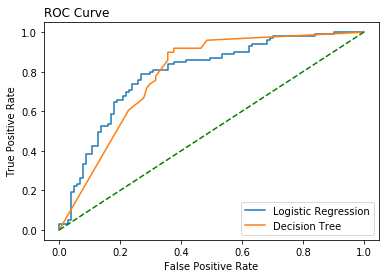

In [25]:
plt.plot(lg_fpr, lg_tpr)
plt.plot(dt_fpr, dt_tpr)
plt.plot(lg_fpr, lg_fpr, color='green', linestyle='dashed')
plt.title('ROC Curve', loc='left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression', 'Decision Tree'], loc='lower right')
plt.show()

> There is a portion of the ROC curve whether we'd prefer the decision tree, given its lower FPR and higher TPR.

In [26]:
dtr = (
pd.DataFrame(list(zip(dt_fpr, dt_tpr, dt_thr)), columns=['FPR','TRP','THRES'])
.sort_values(by='THRES')    
)

dtr.query('THRES > 0.4 and THRES < 1')

,FPR,TRP,THRES
8,0.356436,0.898990,0.428571
7,0.356436,0.858586,0.500000
6,0.316832,0.777778,0.666667
5,0.316832,0.757576,0.750000
4,0.297030,0.737374,0.857143
3,0.287129,0.717172,0.882353
2,0.277228,0.666667,0.888889


> Overall, the logistic regression appears to be the better model. The accuracy on the test set is higher and the ROC is generally better at most threshold values. However, we can set the threshold for the `Decision Tree` at `0.428` and have a better trade-off between false-positives and true-positives. Eyeballing the ROC chart, for the `Logistic Regression` we might want to consider a threshold of `0.3` since that seems to be the point where we begin to see slowing gains in the FPR/TPR trade-off.

In [27]:
from sklearn.metrics import classification_report

lg_pred_evt = lg.predict_proba(x_test)
lg_pred_evt = np.where(lg_pred_evt[:,1] < 0.3, 'No', 'Yes')

print(classification_report(y_test, lg_pred_evt, labels=['No','Yes']))

              precision    recall  f1-score   support

          No       0.85      0.34      0.48       101
         Yes       0.58      0.94      0.72        99

    accuracy                           0.64       200
   macro avg       0.72      0.64      0.60       200
weighted avg       0.72      0.64      0.60       200



In [28]:
dt_pred_evt = dt.predict_proba(x_test)
dt_pred_evt = np.where(dt_pred_evt[:,1] < 0.43, 'No', 'Yes')

print(classification_report(y_test, dt_pred_evt, labels=['No','Yes']))

              precision    recall  f1-score   support

          No       0.82      0.64      0.72       101
         Yes       0.70      0.86      0.77        99

    accuracy                           0.75       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.75      0.75       200



>Confirms the lower threshold for the decision tree creates a higher recall and not a significant trade-off to precision; a similar experiment for logistic regression shows a even better recall, but a larger impact to accuracy. If that trade-off is acceptable from a business perspective, we could recommend the `decision tree` with the non-standard threshold value given the apparent "free lunch". However, due to the overfitting that we suspect the decision tree is doing, I would be cautious in choosing that without additional testing to determine the stability of the performance results. As of now, the logistic regression seems to provide at least comparable, if not better, performance, than the decision tree, without overfitting, so we can reasonably defend choosing the logistic regression with a `C=0.01` regularization value.

### Notes
- No errors, warnings -- shouldn't see those in the EDA or projects.  
- Be thorough -- there isn't a lot of additional work to be thorough.  
- Be creative  
- Use markdowns to annotate what you are seeing - I don't know if you understand the output without discussing.